In [17]:
import numpy as np
import numpy.core.multiarray
from scipy import misc
from matplotlib import pylab as plt
#import matplotlib.cm as cm
import pandas as pd
from datetime import datetime, date

In [18]:
df_original = pd.read_csv('202207-citbike-tripdata.csv')

C:\Users\14850\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
df = df_original.copy()

In [20]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member


### Warm-up

#### 1. Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.


In [21]:
df = df_original.copy()
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['duration'] = (df['ended_at'] - df['started_at']).apply(lambda x: x.value) / 10**9
df = df[(df['duration'] > 0) & (df['duration'] < 3600*3)]
#print(df['duration'])

(array([2.537686e+06, 6.939260e+05, 1.642440e+05, 4.775000e+04,
        1.867000e+04, 9.248000e+03, 5.408000e+03, 3.299000e+03,
        2.189000e+03, 1.416000e+03]),
 array([1.0000e+00, 1.0808e+03, 2.1606e+03, 3.2404e+03, 4.3202e+03,
        5.4000e+03, 6.4798e+03, 7.5596e+03, 8.6394e+03, 9.7192e+03,
        1.0799e+04]),
 <BarContainer object of 10 artists>)

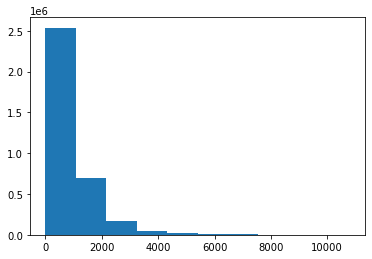

In [22]:
# durations = []
# format_data = "%Y-%m-%d %H:%M:%S"
# for index, row in df.iterrows():
#     duration = (datetime.strptime(df.iloc[index,3], format_data) - datetime.strptime(df.iloc[index,2], format_data)).total_seconds()
#     if duration > 3600 * 3 or duration < 0:
#         df.drop(index, inplace=True)
#     else:
#         durations.append(duration)
#     if index % 10000 == 0:
#         print('Working on', index)
plt.hist(df['duration'])

In [23]:
stations = df.groupby(['start_station_name'])['start_station_name'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [24]:
temp = stations[(stations['count'] > 5000) & (stations['count'] < 8000)]

In [25]:
temp

,start_station_name,count
1528,Washington St & Gansevoort St,7988
422,Broadway & E 19 St,7956
1434,W 27 St & 7 Ave,7866
1456,W 42 St & 6 Ave,7829
529,Christopher St & Greenwich St,7783
...,...,...
950,Howard St & Lafayette St,5086
1530,Water St & Fletcher St,5085
1435,W 29 St & 9 Ave,5072
397,Berry St & N 8 St,5068


In [26]:
df_1_depart = df[df['start_station_name'] == 'W 27 St & 7 Ave']
df_1_arrive = df[df['end_station_name'] == 'W 27 St & 7 Ave']
df_1 = df[(df['start_station_name'] == 'W 27 St & 7 Ave') & (df['end_station_name'] == 'W 27 St & 7 Ave')]

In [28]:
print(min(df_1['started_at']), max(df_1['started_at']))

2022-07-01 00:03:24 2022-07-31 23:43:20
